# Import Necessary Libraries

In [47]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

# Loading Data

In [48]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [49]:
# Create a DataFrame from X and y
data = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})

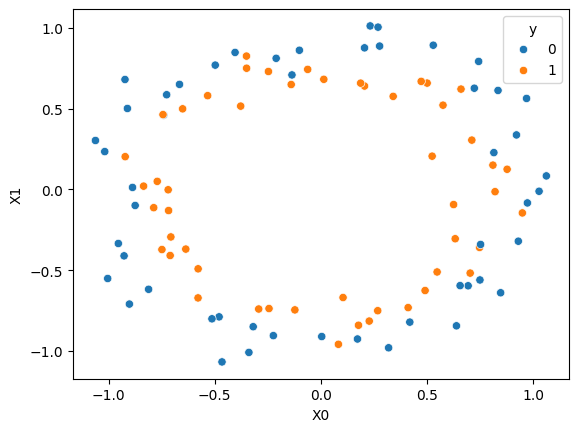

In [50]:
# Plot using Seaborn scatterplot
sns.scatterplot(data=data, x='X0', y='X1', hue='y')
plt.show()

In [51]:
#Splitting

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [53]:
# Modeling

In [54]:
model = Sequential()

model.add(Dense(256 , activation='relu', input_dim=2)) #256 Nodes mean basically Neuron
model.add(Dense(1, activation='sigmoid')) #Output

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

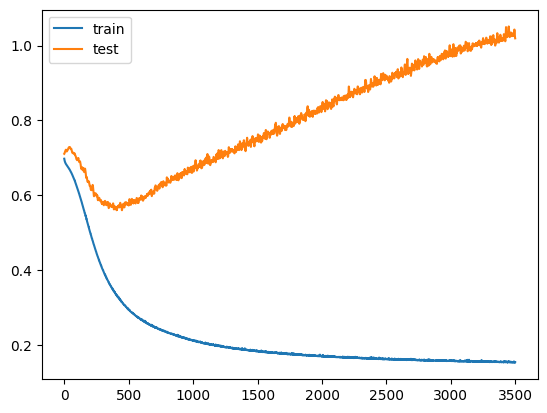

In [57]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# as we can see there is lot's of overfitting

9600/9600 [==============================] - 15s 2ms/step


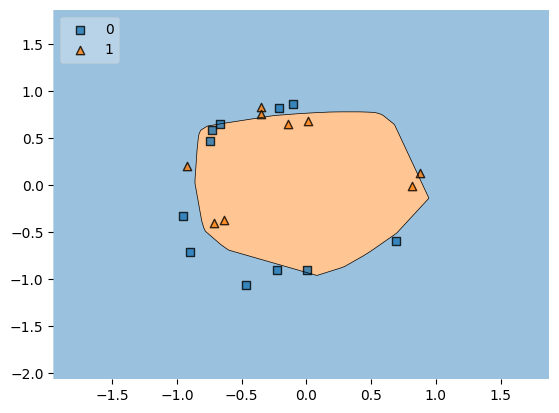

In [58]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [ ]:
# Early Stop means when your model gets overfitting it will stop there

In [59]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# here we by callback object tuning some perameters
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [62]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 126ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.7074 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6915 - accuracy: 0.5375 - val_loss: 0.7065 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 29ms/step - loss: 0.6904 - accuracy: 0.5250 - val_loss: 0.7053 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6897 - accuracy: 0.5500 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.7036 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6880 - accuracy: 0.5500 - val_loss: 0.7033 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6870 - accuracy: 0.5375 - val_loss: 0.7045 - val_accuracy: 0.4000
Epoch 8/3500

In [ ]:
# have a look it's stop in 26 epoch

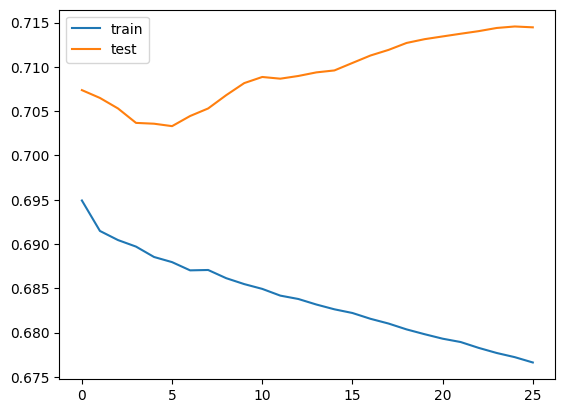

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# also have a look this graph

9600/9600 [==============================] - 16s 2ms/step


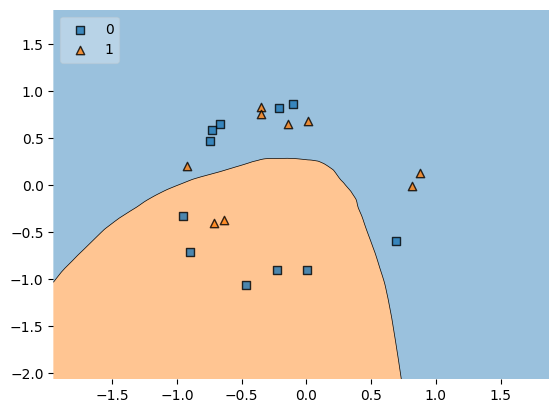

In [64]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()